# Telecom Churn
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
#Import necessary libraries

#Visualization and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# Missing value imputaion
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Test Train Split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Logistic Regression ,RFE &VIF
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Model Analysis
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting up display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# reading the dataset
df = pd.read_csv(".../telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Basic Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.shape

(99999, 226)

In [6]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# List of categorical columns
categorical_vars = list(df.select_dtypes(['object']).columns)
categorical_vars

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [8]:
# List of numerical columns
numeric_vars = list(df.select_dtypes(['float64', 'int64']).columns)
numeric_vars

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

### Missing Value Check

In [9]:
# Finding the percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

Looks like we have a lot of missing values so we shall use different techniques to handle them.
First let us drop the columns with more than 70% missing values

In [10]:
#list of columns with more than 70% missing value

cols_to_drop=df.columns[(round(100*(df.isnull().sum()/len(df.index)), 2)) >70]
cols_to_drop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], dtype='object')

In [11]:
#dropping columns with more than 70% missing values

df.drop(cols_to_drop,axis=1,inplace=True)

In [12]:
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

Now that we have dropped all columns with more than 70% values let us now replace some columns with 0 in place of missing values

In [13]:
#Imputing 0's for missing values

df['loc_og_t2o_mou'] = df['loc_og_t2o_mou'].fillna(0)
df['std_og_t2o_mou'] = df['std_og_t2o_mou'].fillna(0)
df['loc_ic_t2o_mou'] = df['loc_ic_t2o_mou'].fillna(0)

In [14]:
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.00
std_og_t2o_mou          0.00
loc_ic_t2o_mou          0.00
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [15]:
#Dropping date columns due to lack of relevance

df_new=df.drop(['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1)

Now that the irrelevant columns have been dropped, lets find the columns which require missing value imputation.

In [16]:
#Columns having missing values which needs them to be imputed.

cols_to_impute=df_new.columns[(round(100*(df_new.isnull().sum()/len(df_new.index)), 2)) >0]


In [17]:
df_new.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00

In [18]:
# Imputing missing values using iterative imputation

imp = IterativeImputer(max_iter=10, verbose=0, min_value=0)
imp.fit(df_new)
imputed_df = imp.transform(df_new)
imputed_df = pd.DataFrame(imputed_df, columns=df_new.columns)

In [19]:
round(100*(imputed_df.isnull().sum()/len(imputed_df.index)), 2)

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

In [20]:
imputed_df.shape

(99999, 178)

There are no more missing values in the data after using iterative impute.

### Filter High Value Customers

The high value customers need to be identified from the given data. This can be done by examining the average recharge amount for months 6 and 7. The 70th percentile of the amount is taken as a benchmark to identify and isolate the high value customers.

In [21]:
#Find the average recharge amt for months 6 & 7

imputed_df['avg_recharge_6_7'] = (imputed_df['total_rech_amt_6'] + imputed_df['total_rech_amt_7']) / 2
imputed_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_6_7
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,141.112926,158.206769,0.00,139.759974,26.814404,19.761407,0.00,18.352294,15.495492,6.544226,0.00,4.981763,45.501253,28.123009,0.00,47.05757,93.306729,91.382103,0.00,90.40465,3.78342,3.803039,0.00,3.699307,0.0,0.00,0.00,0.00,10.25495,0.00,0.00,0.00,94.975708,93.7092,0.00,99.824321,87.126395,90.59481,0.00,86.329882,1.199927,1.185399,0.00,1.070432,0.0,0.0,0.0,0.0,122.164841,123.608207,0.00,120.909072,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,63.745244,48.354794,0.16,73.711766,107.482788,107.117275,4.13,106.17272,12.076249,12.592742,1.15,12.163271,76.815931,68.507968,5.44,79.586137,31.820964,25.979936,0.00,37.678933,20.71865,21.654565,0.00,19.617591,2.160468,2.218183,0.00,2.176834,0.0,0.0,0.0,0.0,3.506088,3.209043,0.00,4.132321,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58,307.0
1,7.001866e+09,109.0,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.560000,7.68,18.34000,11.510000,75.940000,291.86,53.76000

In [22]:
# 70th percentile value

val = imputed_df['avg_recharge_6_7'].quantile(0.7)
val

368.5

In [23]:
# Retain rows with avg recharge amount value greater than or equal to 70th percentile to obtain high value customers

df_hvc = imputed_df[imputed_df['avg_recharge_6_7'] >= val]
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_6_7
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,141.390153,16.23,33.49,31.64,34.026221,23.74,12.59,38.06,3.586807,51.39,31.38,40.28,47.057563,308.63,447.38,162.28,90.403655,62.13,55.14,53.23,3.699728,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,99.822696,49.89,31.76,49.14,86.329834,6.66,20.08,16.68,1.071244,0.0,0.0,0.0,0.0,60.86,75.14,77.84,120.909913,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,73.706997,217.56,221.49,121.19,106.172641,152.16,101.46,39.53,12.163467,427.88,355.23,188.04,79.581,36.89,11.83,30.39,37.672118,91.44,126.99,141.33,19.61749,52.19,34.24,22.21,2.176921,0.0,0.0,0.0,0.0,180.54,173.08,193.94,4.13119,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.330000,13.69,10.04,75.6

In [24]:
df_hvc.shape

(30011, 179)

The high value customers have been isolated in the above dataframe.

### Derive Churn

To find if a customer is churned or not , we need to examine the month 9 usage data for both data and calls. If both of these values are 0, the, customer is churned.

In [25]:
colList = list(df_hvc.columns)

The columns 'vol_3g_mb_9','vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' can be used to find the usage of a customer. If any of these values are not 0, then the customer is not churned.

In [26]:
# Columns that identify is  a customer is churned or not
mouVolList = ['vol_3g_mb_9','vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']
df_hvc['total_usage_mou_vol'] = 0

#Summing the data and call usage columns and assign to a new column 'total_usage_mou_vol'
for i in mouVolList:
    df_hvc['total_usage_mou_vol'] +=df_hvc[i]
df_hvc['total_usage_mou_vol'] = round(df_hvc['total_usage_mou_vol'], 2)
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_6_7,total_usage_mou_vol
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,141.390153,16.23,33.49,31.64,34.026221,23.74,12.59,38.06,3.586807,51.39,31.38,40.28,47.057563,308.63,447.38,162.28,90.403655,62.13,55.14,53.23,3.699728,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,99.822696,49.89,31.76,49.14,86.329834,6.66,20.08,16.68,1.071244,0.0,0.0,0.0,0.0,60.86,75.14,77.84,120.909913,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,73.706997,217.56,221.49,121.19,106.172641,152.16,101.46,39.53,12.163467,427.88,355.23,188.04,79.581,36.89,11.83,30.39,37.672118,91.44,126.99,141.33,19.61749,52.19,34.24,22.21,2.176921,0.0,0.0,0.0,0.0,180.54,173.08,193.94,4.13119,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,0.00
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,

In [27]:
# If 'total_usage_mou_vol' is 0 the churned (churn =1) else not churned (churn=0)

df_hvc['churn'] = df_hvc['total_usage_mou_vol'].apply(lambda x: 1 if x == 0 else 0)
df_hvc.head(8)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_6_7,total_usage_mou_vol,churn
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,141.390153,16.23,33.49,31.64,34.026221,23.74,12.59,38.06,3.586807,51.39,31.38,40.28,47.057563,308.63,447.38,162.28,90.403655,62.13,55.14,53.23,3.699728,0.00,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,99.822696,49.89,31.76,49.14,86.329834,6.66,20.08,16.68,1.071244,0.0,0.0,0.0,0.0,60.86,75.14,77.84,120.909913,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,73.706997,217.56,221.49,121.19,106.172641,152.16,101.46,39.53,12.163467,427.88,355.23,188.04,79.581,36.89,11.83,30.39,37.672118,91.44,126.99,141.33,19.61749,52.19,34.24,22.21,2.176921,0.0,0.0,0.0,0.0,180.54,173.08,193.94,4.13119,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,0.00,1
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.00,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116

In [28]:
#Identifying the count of 0's and 1's in 'churn'

df_hvc['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

Now the churn rate can be visualized with the help of a pie chart.

Text(0.5, 1.0, 'Churn Distribution')

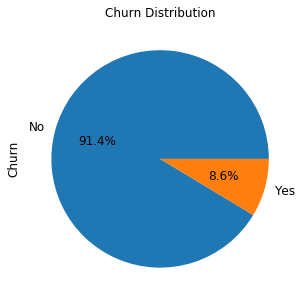

In [29]:
ax = (df_hvc['churn'].value_counts()*100.0 /len(df_hvc)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],
                                                                  figsize =(5,5), fontsize = 12 )                                                                        

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In our data, 91% of the customers do not churn. Clearly the data is imbalanced as a large majority of the customers to not churn. This needs to be dealt with during modelling.

Now the columns with data corresponding to month 9 may be dropped since it is what we are predicting using the month 6,7 & 8 month data.

In [30]:
#columns with month 9 data

m9_list=list(df_hvc.columns)
m9_list=[x for x in m9_list if any(letter in x for letter in '9')]
m9_list.append('sep_vbc_3g')
m9_list

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'sep_vbc_3g']

In [31]:
# dropping month 9 data

df_hvc_wo_m9=df_hvc.drop(m9_list,axis=1)
list(df_hvc_wo_m9.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6

In [32]:
#Churn Percentage

churn_percent = (sum(df_hvc_wo_m9['churn'])/len(df_hvc_wo_m9['churn'].index))*100
churn_percent

8.64016527273333

## Data Preparation

### Outlier Treatment

Since we are planning to use PCA while modelling, the outliers need to be dealt with to avoid skewing of data.

In [33]:
#Identifying various percentile of each column

df_hvc_wo_m9.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_6_7,total_usage_mou_vol,churn
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.284404,589.135427,534.857433,296.036326,304.349892,267.601261,419.418475,425.525995,379.081147,17.729286,13.721639,14.330775,29.486233,22.110476,21.809879,95.159796,96.013666,88.295296,182.262056,182.194146,170.4605

In [34]:
# list of numerical columns
num_col_list=df_hvc_wo_m9.select_dtypes(include=np.number).columns.tolist()
len(num_col_list)

138

In [35]:
num_col_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6

The outliers of the numerical columns maybe visualized with the boxplots .

In [36]:
c=1
plt.figure(figsize=(50,300))

for i in num_col_list:
    plt.subplot(28,5,c)
    plt.title(i)
    ax = sns.boxplot(x=df_hvc_wo_m9[i],whis=1.5)
    c+=1
plt.tight_layout()

From the above boxplots and statistical description , there is are quite a few outliers. So lets cap them at 0.05 at bottom level and 0.95 at upper level wrt to the interquartile range.

In [37]:
#Removing columns that do no need outlier treatment from the list.

remove_list=['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','churn']
for i in remove_list:
    num_col_list.remove(i)
len(num_col_list)

132

In [38]:
df_hvc_wo_m9.shape

(30011, 138)

In [39]:
df_hvc_wo_m9_outlier=df_hvc_wo_m9.copy()

In [40]:
# Capping the outliers

for i in num_col_list:
    Q1 = df_hvc_wo_m9_outlier[i].quantile(0.05)
    Q3 = df_hvc_wo_m9_outlier[i].quantile(0.95)
    IQR= Q3-Q1
    lower_lim=Q1-(1.5*IQR)
    upper_lim=Q3+(1.5*IQR)
    df_hvc_wo_m9_outlier[i] = df_hvc_wo_m9_outlier[i].clip(lower_lim,upper_lim)

In [41]:
df_hvc_wo_m9_outlier.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_6_7,total_usage_mou_vol,churn
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,582.104072,583.583421,529.739411,292.181082,300.103298,262.555639,416.320709,421.685335,374.089159,13.597787,8.892940,9.737010,24.154140,16.623243,15.970361,84.714588,84.576350,78.150766,179.486803,179.972872,168.429540,6.247779,6.3

The outliers have been treatedd in a satisfatory manner as visible from above data.

In [42]:
df_hvc_wo_m9.shape

(30011, 138)

In [43]:
df_hvc_wo_m9_outlier.shape

(30011, 138)

The AON column is in days which be converted to months through deriving a new column.

In [44]:
#Convert AON in Months
df_hvc['aon_mon'] = df_hvc['aon']/30
df_hvc['aon_mon'].head()

7     26.733333
8     10.500000
13    86.900000
16    17.033333
17    22.233333
Name: aon_mon, dtype: float64

In [45]:
# Drop the original AON column

df_hvc.drop('aon', axis=1, inplace=True)

Now the distribution of customers as per the tenure can be studied with the help of barplot.

Text(0.5, 1.0, 'Customers by their tenure')

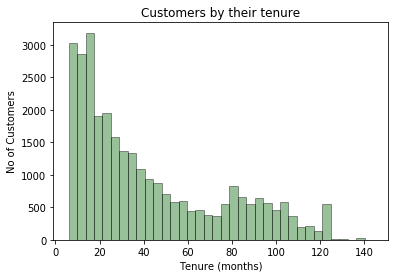

In [46]:
ax = sns.distplot(df_hvc['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 6})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

We can also study the relation between tenure and revenue for the months 6,7and 8.

Text(0.5, 0, 'Avg Revenue per customer')

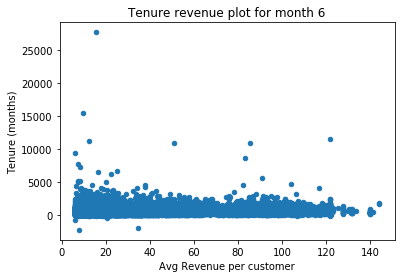

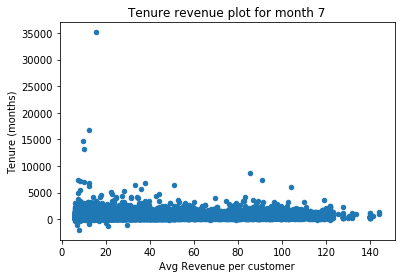

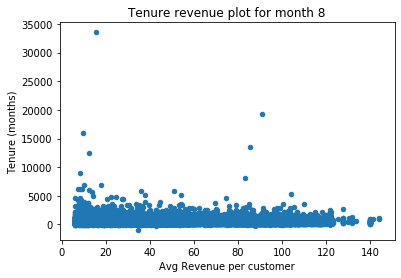

In [47]:
ax=df_hvc[['aon_mon', 'arpu_6']].plot.scatter(x = 'aon_mon', y='arpu_6')
ax.set_title('Tenure revenue plot for month 6')
ax.set_ylabel('Tenure (months)')
ax.set_xlabel('Avg Revenue per customer')

ax=df_hvc[['aon_mon', 'arpu_7']].plot.scatter(x = 'aon_mon', y='arpu_7')
ax.set_title('Tenure revenue plot for month 7')
ax.set_ylabel('Tenure (months)')
ax.set_xlabel('Avg Revenue per customer')

ax=df_hvc[['aon_mon', 'arpu_8']].plot.scatter(x = 'aon_mon', y='arpu_8')
ax.set_title('Tenure revenue plot for month 8')
ax.set_ylabel('Tenure (months)')
ax.set_xlabel('Avg Revenue per customer')

Now, the analysis of how tenure affects churn may be studied with the help of a boxplot.

Text(0.5, 0, 'Churn')

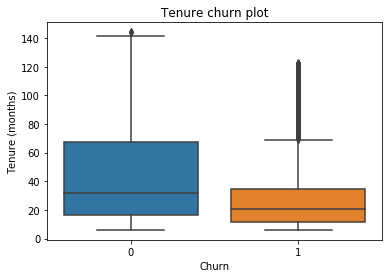

In [48]:
ax=sns.boxplot(x = df_hvc.churn, y = df_hvc.aon_mon)
ax.set_title('Tenure churn plot')
ax.set_ylabel('Tenure (months)')
ax.set_xlabel('Churn')

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

## Interpretable Model using Random Forest

### Test Train Split

In [49]:
# Defining the X and y sets from the given dataset

X=df_hvc_wo_m9_outlier.drop(['mobile_number','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','churn'],axis=1)
y=df_hvc_wo_m9_outlier['churn']

In [50]:
# Splitting X and y into test and train data in 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling

In [51]:
#Scaling is done using the MinMaxscaler

#Instantiate Scaler
scaler = MinMaxScaler()

#Fit the data
X_train_scaled= pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns=X_train.columns.values

In [52]:
X_train_scaled.columns=X_train.columns.values

In [53]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_6_7,total_usage_mou_vol
0,0.475221,0.468444,0.252593,0.075079,0.025288,0.000244,0.364146,0.396186,0.042829,0.0,0.0,0.0,0.0,0.0,0.0,0.001079,0.003321,0.000000,0.015182,0.013588,0.000670,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.010397,0.010229,0.000444,0.087354,0.028528,0.000290,0.463897,0.491510,0.056673,0.0,0.0,0.0,0.0,0.0,0.0,0.341267,0.321868,0.033260,0.0,0.000000,0.0,0.073256,0.091322,0.025273,0.336232,0.0,0.0,0.285495,0.275693,0.027447,0.000000,0.000000,0.000000,0.013977,0.016608,0.001108,0.000000,0.000000,0.000000,0.009427,0.011053,0.000747,0.021803,0.019895,0.000000,0.282615,0.245953,0.004529,0.000000,0.0,0.0,0.0,0.0,0.0,0.185486,0.162819,0.002876,0.047926,0.044957,0.001213,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.127660,0.156028,0.043796,0.227545,0.207257,0.008032,0.091973,0.091973,0.026374,0.174603,0.102190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000740,0.000000,0.000000,0.000000,0.143128,0.039462
1,0.402696,0.428073,0.320674,0.009437,0.019603,0.016543,0.107170,0.095931,0.059285,0.0,0.0,0.0,0.0,0.0,0.0,0.031198,0.068193,0.056937,0.213568,0.199857,0.118237,0.044769,0.014200,0.029128,0.041427,0.00000,0.0,0.153806,0.158287,0.100257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.079821,0.000000,0.000000,0.000000,0.0,0.0,0.076329,0.074885,0.047033,0.063278,0.077346,0.031106,0.141910,0.234783,0.131227,0.000000,0.105253,0.010835,0.115771,0.190369,0.098827,0.000000,0.000000,0.013515,0.000000,0.000000,0.004267,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007043,0.096045,0.158162,0.083228,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00551,0.0,0.010178,0.127660,0.127660,0.116788,0.117066,0.141074,0.119143,0.076087,0.121237,0.127473,0.079365,0.132847,0.079365,0.010116,0.016374,0.026484,0.062236,0.103902,0.061116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.4,0.4,0.0,0.063132,0.088095,0.136281,0.103815,0.027188,0.118526
2,0.462618,0.479205,0.406508,0.005043,0.015526,0.016306,0.068075,0.079863,0.101772,0.0,0.0,0.0

### Grid Search to Find Optimal Hyperparameters

Before implementing the random forest model, the optimum no. of hyper parameters like depth , no. of featues etcc. need to be determine. This can be done with the help of gridsearch.

In [54]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(4,7),
    'min_samples_leaf': range(200, 400, 100),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5,10,15]
}
# Create a based model
rf_model = RandomForestClassifier(criterion = 'gini',class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [55]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 12.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                       

In [56]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9784828095030976 using {'max_depth': 6, 'max_features': 15, 'min_samples_leaf': 200, 'min_samples_split': 200, 'n_estimators': 200}


In [57]:
# model with the best hyperparameters

rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},
                             criterion = 'gini',
                             bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=200, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=300)

In [58]:
# fit
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=5, max_features=15, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [59]:
# predict
predictions = rfc.predict(X_train_scaled)

print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19227
           1       0.82      1.00      0.90      1780

    accuracy                           0.98     21007
   macro avg       0.91      0.99      0.94     21007
weighted avg       0.98      0.98      0.98     21007



In [60]:
rfc.score(X_train_scaled, y_train)

0.9811967439424953

In [61]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	1.0
Specificity: 	0.98


In [62]:
# Print the name and gini importance of each feature
for feature in zip(X_train_scaled.columns, rfc.feature_importances_):
    print(feature)

('arpu_6', 0.00033581889608456076)
('arpu_7', 0.0011823713309703258)
('arpu_8', 0.033194595628157395)
('onnet_mou_6', 0.0004047944204556656)
('onnet_mou_7', 0.0003740107369816914)
('onnet_mou_8', 0.01236519623065031)
('offnet_mou_6', 0.0001830679387749509)
('offnet_mou_7', 0.0004405334748784441)
('offnet_mou_8', 0.00699120829922432)
('roam_ic_mou_6', 0.00014723971070184822)
('roam_ic_mou_7', 0.0007307369340314836)
('roam_ic_mou_8', 0.06602236528579147)
('roam_og_mou_6', 1.9424211857241893e-05)
('roam_og_mou_7', 0.0022748968802858757)
('roam_og_mou_8', 0.06615141851167322)
('loc_og_t2t_mou_6', 0.00020444381292735679)
('loc_og_t2t_mou_7', 0.0001900765847844189)
('loc_og_t2t_mou_8', 0.010301581208139787)
('loc_og_t2m_mou_6', 0.0002168976661904123)
('loc_og_t2m_mou_7', 0.001262591778307525)
('loc_og_t2m_mou_8', 0.014295639249730539)
('loc_og_t2f_mou_6', 0.00035254818344858044)
('loc_og_t2f_mou_7', 0.00025317696734696726)
('loc_og_t2f_mou_8', 0.003962214801287547)
('loc_og_t2c_mou_6', 0.0)


In [63]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sel = SelectFromModel(rfc)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight={0: 0.1, 1: 0.9},
                                                 criterion='gini', max_depth=5,
                                                 max_features=15,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=200,
                                                 min_samples_split=200,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300, n_jobs=None,
                                                 oob_score=False,
                                       

In [64]:
# Print the names of the most important features
for feature_list_index in sel.get_support(indices=True):
    print(X_train_scaled.columns[feature_list_index])

arpu_8
onnet_mou_8
offnet_mou_8
roam_ic_mou_8
roam_og_mou_8
loc_og_t2t_mou_8
loc_og_t2m_mou_8
loc_og_mou_8
total_og_mou_8
loc_ic_t2m_mou_8
loc_ic_mou_8
total_ic_mou_8
total_rech_amt_8
max_rech_amt_8
last_day_rch_amt_8
total_usage_mou_vol


In [65]:
#Scaling Test data

X_test_scaled= pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.columns=X_test.columns.values

In [66]:
# predict
predictions = rfc.predict(X_test_scaled)

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      8191
           1       0.80      1.00      0.89       813

    accuracy                           0.98      9004
   macro avg       0.90      0.99      0.94      9004
weighted avg       0.98      0.98      0.98      9004



In [68]:
# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	1.0
Specificity: 	0.97


In [69]:
rfc.score(X_test_scaled, y_test)

0.9771212794313638

Here the scores seem satisfactory . However, other models may be made to see if better results can be obtained.

## Decision Tree Model with PCA

Previously the model was done using random forest. Now lets try applying PCA and run Decision tree model .

### PCA for decision tree

In [70]:
from sklearn.decomposition import PCA

# Instantiate pca
pca_dt = PCA(random_state=42)
pca_dt.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 132 artists>

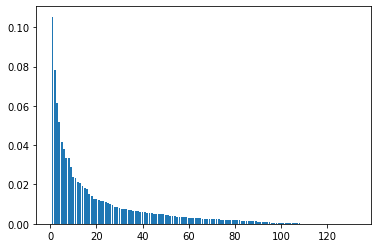

In [71]:
#Plotting the variance ratio

plt.bar(range(1,len(pca_dt.explained_variance_ratio_)+1), pca_dt.explained_variance_ratio_)

In [72]:
var_cumu = np.cumsum(pca_dt.explained_variance_ratio_)
var_cumu 

array([0.1053806 , 0.18339174, 0.245083  , 0.29692678, 0.3384998 ,
       0.37638545, 0.40993176, 0.44321692, 0.47215853, 0.49595851,
       0.51924059, 0.54068365, 0.56126302, 0.58074245, 0.59897384,
       0.61648143, 0.63172757, 0.64577832, 0.65854986, 0.67104387,
       0.68332295, 0.69517153, 0.70676505, 0.71803022, 0.72846542,
       0.73848757, 0.74814565, 0.75683745, 0.76537936, 0.77350451,
       0.78126619, 0.7888546 , 0.79614616, 0.80332072, 0.81018837,
       0.81682419, 0.82318002, 0.82946118, 0.83555088, 0.84159833,
       0.84743511, 0.85310644, 0.8586948 , 0.86410598, 0.86919667,
       0.87411697, 0.87899807, 0.88377129, 0.88852357, 0.89298838,
       0.89727233, 0.90133784, 0.90536691, 0.90925914, 0.91289406,
       0.91638647, 0.9197057 , 0.92294555, 0.92617718, 0.92936028,
       0.93246643, 0.93539173, 0.93828092, 0.94108262, 0.94387914,
       0.94654951, 0.94911107, 0.95161483, 0.95408551, 0.95643448,
       0.95873402, 0.96096766, 0.96316026, 0.96519811, 0.96721

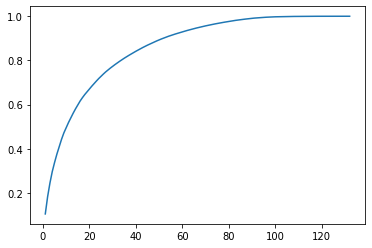

In [73]:
#### Making Scree Plot

plt.plot(range(1,len(var_cumu)+1), var_cumu)

from th above scree plot , it can be seen that the variance flattens out beyond 45 to 50 variables. SO lets try running a decision tree model with PCA components numbering at 50.

In [74]:
pca_dt_final = PCA(n_components=50, random_state=42)

In [75]:
pca_col_name=[]
for i in range(1,51):
    pca_col_name.append("PC{0}".format(i))

In [76]:
X_train_PCA = pd.DataFrame((pca_dt_final.fit_transform(X_train_scaled)),columns=pca_col_name)

In [77]:
X_train_PCA.shape

(21007, 50)

In [78]:
X_train_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.681308,0.244962,0.014064,-0.122884,-0.033881,0.088584,-0.478223,-0.041335,-0.289460,0.137305,0.201251,0.358742,-0.019187,-0.094036,-0.133357,-0.127326,0.057891,0.017393,-0.009734,-0.017981,0.056392,0.082987,-0.017892,0.059064,-0.215240,0.011909,-0.027190,0.003414,0.108687,-0.107215,-0.081497,-0.040441,-0.018073,-0.034148,0.117303,0.080288,-0.013570,-0.105917,-0.039601,-0.006959,0.004886,0.186492,0.062379,-0.039598,-0.014453,-0.024114,-0.216303,0.183756,-0.025718,0.038316
1,-0.070027,-0.482122,-0.052308,0.271734,0.128652,-0.014842,-0.103240,-0.032220,-0.223919,0.049206,0.111887,-0.087845,0.063243,0.233951,0.045861,0.072343,0.068515,0.046055,0.075599,-0.000288,0.198759,0.170526,0.063032,-0.069575,-0.121667,-0.267203,0.008866,-0.009207,-0.168875,-0.073540,-0.013782,-0.119169,0.027001,0.029100,0.040189,0.027892,-0.004509,-0.079207,0.087171,0.001445,-0.064429,-0.010597,-0.040096,-0.034275,0.058147,-0.085228,0.086825,0.059615,0.009723,-0.056629
2,0.124460,-0.346311,-0.385769,-0.045335,-0.117791,-0.116300,-0.099742,-0.052066,-0.223836,-0.188420,-0.143282,-0.085458,-0.031627,0.099367,0.011890,0.200398,-0.360563,-0.090775,-0.090142,0.098818,-0.095025,-0.052939,-0.020944,-0.029630,-0.011237,-0.047992,0.020215,0.083802,0.064482,-0.008262,0.011632,0.035616,-0.026401,0.012211,-0.034557,-0.014711,0.016819,0.078372,0.055782,-0.038260,0.080717,0.026500,0.040601,0.010134,-0.004337,-0.055978,0.009116,-0.010873,0.025915,0.026075
3,0.004241,-0.344819,0.204502,0.126832,-0.558356,0.086221,-0.074560,-0.344918,0.400626,-0.305014,0.275456,-0.316551,-0.890257,-0.282559,-0.023085,0.026969,-0.253542,-0.618585,0.082767,0.099560,0.022096,-0.002146,0.062444,-0.209833,-0.033941,0.168394,-0.546360,0.274309,0.876467,-0.263996,-0.056068,0.071747,0.045985,0.029405,0.465848,0.095468,-0.331947,-0.012942,0.071374,-0.109129,0.198938,-0.215805,-0.339915,0.040367,-0.343003,-0.174986,0.086837,-0.196104,0.090227,0.264534
4,-0.558243,1.359639,-0.006245,0.565598,0.044495,0.362890,0.051961,-0.031192,0.429660,-0.188247,0.511895,0.740337,-0.110249,-0.136863,-0.066502,0.188014,-0.062521,-0.087056,-0.076880,-0.064224,-0.194685,-0.212886,-0.039144,0.237601,0.008059,-0.230653,-0.206808,0.273329,0.317333,-0.102353,-0.077301,0.014816,0.361331,-0.218450,0.228144,-0.043280,0.055128,-0.199080,0.021858,-0.025798,-0.102548,-0.246245,0.141789,0.201881,-0.285748,0.072441,-0.437661,-0.016613,-0.195951,0.063152


In [79]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth':[5,6,7],
    'min_samples_leaf': range(200, 500, 100),
    'min_samples_split': range(200, 500, 100),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_PCA,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

In [80]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.911932,0.024525,0.000000,0.000000,entropy,5,200,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.822228,0.814850,0.784337,0.790288,0.802904,0.802921,0.014283,2
1,0.890707,0.000176,0.006251,0.007655,entropy,5,200,300,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.822228,0.814850,0.784337,0.790288,0.802904,0.802921,0.014283,2
2,0.900108,0.016015,0.000000,0.000000,entropy,5,200,400,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.822228,0.814850,0.785765,0.790288,0.802904,0.803207,0.013918,1
3,0.843836,0.000150,0.006246,0.007650,entropy,5,300,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.832461,0.760114,0.768388,0.769817,0.752916,0.776739,0.028518,37
4,0.968826,0.161787,0.006250,0.007655,entropy,5,300,300,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.832461,0.760114,0.768388,0.769817,0.752916,0.776739,0.028518,37
5,0.853247,0.007807,0.000000,0.000000,entropy,5,300,400,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.832461,0.760114,0.768388,0.769817,0.752916,0.776739,0.028518,37
6,0.809417,0.006213,0.006250,0.007655,entropy,5,400,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.816040,0.782485,0.768388,0.799572,0.752916,0.783880,0.022276,25
7,0.818897,0.012471,0.000000,0.000000,entropy,5,400,300,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.816040,0.782485,0.768388,0.799572,0.752916,0.783880,0.022276,25
8,0.818844,0.012484,0.000000,0.000000,entropy,5,400,400,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.816040,0.782485,0.768388,0.799572,0.752916,0.783880,0.022276,25
9,1.003264,0.011719,0.003125,0.006250,entropy,6,200,200,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.815326,0.796525,0.792668,0.790288,0.815758,0.802113,0.011145,4


In [81]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8032069946402235
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


From above we can surmise the optimal hyperparameters as the following:
     - max_depth=5
     - min_samples_leaf=200
     - min_samples_split=200
So the model is to be rum with the hyperparameters set at above values.

In [82]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9},
                                  criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=200,
                                  min_samples_split=200)
clf_gini.fit(X_train_PCA, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [83]:
clf_gini.score(X_train_PCA, y_train)

0.8003998667110963

In [84]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_train_pred = clf_gini.predict(X_train_PCA)
print(classification_report(y_train, y_train_pred))

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     19227
           1       0.27      0.80      0.40      1780

    accuracy                           0.80     21007
   macro avg       0.62      0.80      0.64     21007
weighted avg       0.92      0.80      0.84     21007

Sensitivity: 	0.8
Specificity: 	0.8


In [85]:
X_test_pca=pd.DataFrame((pca_dt_final.fit_transform(X_test_scaled)),columns=pca_col_name)

In [86]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_test_pred = clf_gini.predict(X_test_pca)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      8191
           1       0.19      0.54      0.28       813

    accuracy                           0.75      9004
   macro avg       0.56      0.65      0.56      9004
weighted avg       0.87      0.75      0.79      9004



In [87]:
# confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[6279 1912]
 [ 377  436]]


In [88]:
clf_gini.score(X_test_pca, y_test)

0.745779653487339

In [89]:
from imblearn.metrics import sensitivity_specificity_support

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.54
Specificity: 	0.77


From the above , it can be clearly seen that overfiiting is happening . Also the sensitivity,specificity and accuracy measures are not up to the mark.
So lets try Logistic regression model with PCA to see if better metrics can be obtained.

## Logistic Regression with PCA

### PCA with Pipeline 

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [91]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [92]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.83
1       21.33
2       27.53
3       32.54
4       36.72
5       40.51
6       43.54
7       46.36
8       49.15
9       51.70
10      54.10
11      56.38
12      58.40
13      60.33
14      62.04
15      63.61
16      65.06
17      66.37
18      67.65
19      68.88
20      69.97
21      71.03
22      72.07
23      73.03
24      73.94
25      74.76
26      75.57
27      76.37
28      77.17
29      77.91
30      78.63
31      79.35
32      80.06
33      80.73
34      81.38
35      82.01
36      82.64
37      83.23
38      83.82
39      84.39
40      84.94
41      85.48
42      86.01
43      86.50
44      86.97
45      87.44
46      87.90
47      88.35
48      88.78
49      89.19
50      89.59
51      89.98
52      90.37
53      90.74
54      91.09
55      91.44
56      91.78
57      92.11
58      92.43
59      92.73
60      93.04
61      93.33
62      93.61
63      93.88
64      94.14
65      94.39
66      94.64
67      94.89
68      95.13
69      95.37
70      95.60
71    

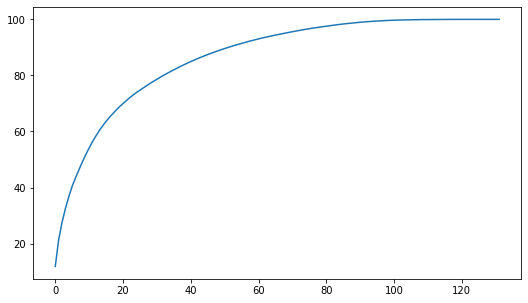

In [93]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

From the above plot it can be seen that the variance flattens out at sround 50. So lets select the no. of components as 50 for PCA.

### PCA with Logistic Regression

In [94]:
# create pipeline
PCA_VARS = 50
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [95]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8351025848526682

In [96]:
# predict churn on train data
y_pred = pipeline.predict(X_train)

# confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = pipeline.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print(classification_report(y_train, y_pred))

[[16014  3213]
 [  251  1529]]
Sensitivity: 	0.86
Specificity: 	0.83
AUC:    	 0.91
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19227
           1       0.32      0.86      0.47      1780

    accuracy                           0.84     21007
   macro avg       0.65      0.85      0.69     21007
weighted avg       0.93      0.84      0.87     21007



In [97]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
# predict churn on test data
y_pred = pipeline.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))

[[6793 1398]
 [ 101  712]]
Sensitivity: 	0.88
Specificity: 	0.83
AUC:    	 0.91
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8191
           1       0.34      0.88      0.49       813

    accuracy                           0.83      9004
   macro avg       0.66      0.85      0.69      9004
weighted avg       0.93      0.83      0.86      9004



Now let us perform hyperparameter tuning on logistic regression

### Hyperparameter tuning - PCA and Logistic Regression

In [98]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.915266
1    0.084734
Name: churn, dtype: float64

In [99]:
from sklearn.model_selection import StratifiedKFold
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [50, 70], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [100]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

In [101]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.659547,0.915800,0.000000,0.000000,0.1,l1,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.374606,0.406867,0.000000,0.000000,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,1.968610,0.129594,0.049993,0.011694,0.1,l2,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.904169,0.917176,0.912034,0.897198,0.899219,0.905959,0.007591,9
3,2.440445,0.018214,0.078120,0.024210,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.964041,0.966849,0.968529,0.967640,0.960271,0.965466,0.003001,8
4,1.596759,0.041217,0.000000,0.000000,0.5,l1,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,2.043599,0.040015,0.000000,0.000000,0.5,l1,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,1.864182,0.030852,0.043748,0.011694,0.5,l2,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.906109,0.915081,0.912709,0.891642,0.895609,0.904230,0.009230,14
7,2.519198,0.043173,0.063144,0.001293,0.5,l2,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.966492,0.970003,0.970204,0.968557,0.966626,0.968377,0.001590,7
8,1.562386,0.009881,0.000000,0.000000,1,l1,50,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,2.059219,0.046768,0.000000,0.000000,1,l1,70,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [102]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9693196211155236
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 70}


In [103]:
# predict churn on train data
y_pred = pipeline.predict(X_train)

# confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = pipeline.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print(classification_report(y_train, y_pred))

[[16014  3213]
 [  251  1529]]
Sensitivity: 	0.86
Specificity: 	0.83
AUC:    	 0.91
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19227
           1       0.32      0.86      0.47      1780

    accuracy                           0.84     21007
   macro avg       0.65      0.85      0.69     21007
weighted avg       0.93      0.84      0.87     21007



In [104]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))

[[7456  735]
 [  45  768]]
Sensitivity: 	0.94
Specificity: 	0.91
AUC:    	 0.97
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      8191
           1       0.51      0.94      0.66       813

    accuracy                           0.91      9004
   macro avg       0.75      0.93      0.81      9004
weighted avg       0.95      0.91      0.92      9004



After performing pca and hyper parameter tuning on Logistic Regerssion model we get good sensitivity and specifcity scores for test data.

### Random Forest

In [105]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("forest", RandomForestClassifier(class_weight={0:0.1, 1: 0.9},max_depth=8,
                             min_samples_leaf=200, 
                             min_samples_split=400,
                             max_features=15,
                             n_estimators=100))
        ]
pipeline = Pipeline(steps)

In [106]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8793735421526158

In [107]:
# predict churn on train data
y_pred = pipeline.predict(X_train)

# confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = pipeline.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print(classification_report(y_train, y_pred))

[[17032  2195]
 [  339  1441]]
Sensitivity: 	0.81
Specificity: 	0.89
AUC:    	 0.93
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     19227
           1       0.40      0.81      0.53      1780

    accuracy                           0.88     21007
   macro avg       0.69      0.85      0.73     21007
weighted avg       0.93      0.88      0.90     21007



In [108]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))

[[7236  955]
 [ 183  630]]
Sensitivity: 	0.77
Specificity: 	0.88
AUC:    	 0.91
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8191
           1       0.40      0.77      0.53       813

    accuracy                           0.87      9004
   macro avg       0.69      0.83      0.73      9004
weighted avg       0.92      0.87      0.89      9004



### Hyper Parameter Tuning for Random Forest with PCA

In [109]:

steps = [("scaler", StandardScaler()),
         ("pca", PCA()),
         ("forest", RandomForestClassifier(class_weight={0:0.1, 1: 0.9}))
        ]
pca_forest = Pipeline(steps)
# hyperparameter space
params = {'pca__n_components': [50, 70],
         'forest__criterion': ['entropy', 'gini'], "forest__max_features": [5,10,15], "forest__max_depth": [5,6,8],
                             "forest__min_samples_leaf": range(100, 200, 100), 
                             "forest__min_samples_split": range(100, 200, 100),
                             "forest__n_estimators": [100,200, 300]} 
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [110]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 93.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('forest',
                                        RandomForestClassifier(boots...
             param_grid={'forest__criterion': ['entropy', 'gini'],
                   

In [111]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__criterion,param_forest__max_depth,param_forest__max_features,param_forest__min_samples_leaf,param_forest__min_samples_split,param_forest__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.073727,0.088569,0.143832,0.016493,entropy,5,5,100,100,100,50,"{'forest__criterion': 'entropy', 'forest__max_...",0.873856,0.889666,0.901113,0.870227,0.886360,0.884244,0.011161,108
1,13.335410,0.277520,0.155134,0.027064,entropy,5,5,100,100,100,70,"{'forest__criterion': 'entropy', 'forest__max_...",0.898435,0.909267,0.926760,0.897553,0.906177,0.907638,0.010553,54
2,23.526789,0.314948,0.192579,0.009337,entropy,5,5,100,100,200,50,"{'forest__criterion': 'entropy', 'forest__max_...",0.876193,0.888545,0.903819,0.876030,0.882201,0.885358,0.010314,101
3,23.627392,0.122143,0.218709,0.016950,entropy,5,5,100,100,200,70,"{'forest__criterion': 'entropy', 'forest__max_...",0.904318,0.909838,0.929141,0.898930,0.912230,0.910892,0.010220,44
4,34.973838,1.096955,0.295423,0.053056,entropy,5,5,100,100,300,50,"{'forest__criterion': 'entropy', 'forest__max_...",0.872566,0.886415,0.903922,0.874109,0.884210,0.884244,0.011234,107
5,36.285971,0.823083,0.337214,0.033114,entropy,5,5,100,100,300,70,"{'forest__criterion': 'entropy', 'forest__max_...",0.902928,0.911242,0.927268,0.901219,0.906666,0.909865,0.009358,49
6,22.965568,0.627185,0.129432,0.026836,entropy,5,10,100,100,100,50,"{'forest__criterion': 'entropy', 'forest__max_...",0.874218,0.891947,0.904182,0.870549,0.887773,0.885734,0.012217,96
7,23.983122,0.262256,0.148192,0.020865,entropy,5,10,100,100,100,70,"{'forest__criterion': 'entropy', 'forest__max_...",0.902682,0.909237,0.929560,0.897504,0.911407,0.910078,0.010907,48
8,45.436593,0.303300,0.248607,0.041669,entropy,5,10,100,100,200,50,"{'forest__criterion': 'entropy', 'forest__max_...",0.872978,0.895367,0.903872,0.867963,0.886906,0.885417,0.013425,99
9,46.618117,0.122403,0.275571,0.057915,entropy,5,10,100,100,200,70,"{'forest__criterion': 'entropy', 'forest__max_...",0.904409,0.912148,0.927332,0.898237,0.913397,0.911105,0.009799,42


In [112]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9201384277956993
Best hyperparameters:  {'forest__criterion': 'entropy', 'forest__max_depth': 8, 'forest__max_features': 10, 'forest__min_samples_leaf': 100, 'forest__min_samples_split': 100, 'forest__n_estimators': 300, 'pca__n_components': 70}


In [113]:
# predict churn on train data
y_pred = pipeline.predict(X_train)

# confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = pipeline.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print(classification_report(y_train, y_pred))

[[17032  2195]
 [  339  1441]]
Sensitivity: 	0.81
Specificity: 	0.89
AUC:    	 0.93
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     19227
           1       0.40      0.81      0.53      1780

    accuracy                           0.88     21007
   macro avg       0.69      0.85      0.73     21007
weighted avg       0.93      0.88      0.90     21007



In [114]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))

[[7451  740]
 [ 206  607]]
Sensitivity: 	0.75
Specificity: 	0.91
AUC:    	 0.92
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8191
           1       0.45      0.75      0.56       813

    accuracy                           0.89      9004
   macro avg       0.71      0.83      0.75      9004
weighted avg       0.93      0.89      0.91      9004



## SUMMARY

The score so far obtained for each model are:
    
    Logistic Regression
        Accuracy - 0.91
        Sensitivity - 0.94
        Specificity - 0.91
    Decision Tree
        Accuracy - 0.54
        Sensitivity - 0.77
        Specificity - 0.75
    Random Forest (Interpretable )
        Accuracy - 0.98
        Sensitivity - 1.0
        Specificity - 0.97

Compared to Random Forest, Logistic Regression and Decision Trees gives lesser scores for sensitivity and specificity hence we can see that Random Forest Interpretable Model works best .

The best Features obtained are
        - arpu_8
        - roam_ic_mou_8
        - roam_og_mou_7
        - roam_og_mou_8
        - loc_og_t2t_mou_8
        - loc_og_t2m_mou_8
        - loc_og_mou_8
        - total_og_mou_8
        - loc_ic_t2m_mou_8
        - loc_ic_mou_8
        - total_ic_mou_8
        - total_rech_amt_8
        - max_rech_amt_8
        - last_day_rch_amt_8
        - total_usage_mou_vol

### Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 
* More focus needs to be paid to the High value customers in action phase (month 8) by offering schemes pertaining to roaming and local calls since features affecting the turnover seems to pertain mosty to same.
* Customers doing recharges of higher amounts may be offered specially streamlined offers as per each customer to retain them.